In [1]:
#Primero declaramos a las bibliotecas que utilizaremos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##1. Construye una tabla de unidades de frío acumuladas UF24 por
#cada día completo de datos a partir del 1 de Noviembre del 2018,
#diseñando un algoritmo en Python para contabilizar las horas frío
#de acuerdo al modelo de Utah de Richardson.

#Leemos el archivo donde se encuentran los  ddatos que vamos a utilizar.
df0 = pd.read_csv("vid18_180219.dat", delimiter = ",", sep = "\s+")

#Creamos un DataFrame con los valores del archivo e imprimimos las primeras 5 linas del archivo.
df = pd.DataFrame(df0)
df.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [3]:
#Conversion de TIMESTAMP en variable.
df0["TIMESTAMP"] = pd.to_datetime(df0.TIMESTAMP)

#Asignandole nombres a la tabla
df1=pd.DataFrame({"Fecha":df0["TIMESTAMP"],"Tempaire":df0["AirTC_Avg"]}, index=range(0,len(df0)))

#Crear columnas con de Mes, Año, Dia y Horas extraídos de la columna fecha.
df1["Mes"] = df0["TIMESTAMP"].dt.month
df1["Año"] = df0["TIMESTAMP"].dt.year
df1["Dias"] = df0["TIMESTAMP"].dt.day
df1["Horas"] = df0["TIMESTAMP"].dt.hour
df1['Minutos'] = df0["TIMESTAMP"].dt.minute
df1['Segundos'] = df0["TIMESTAMP"].dt.second

#Impresion de la los primeros y ultimos 5 datos de la tabla de datos.
df1.head(), df1.tail()

(                Fecha  Tempaire  Mes   Año  Dias  Horas  Minutos  Segundos
 0 2018-05-11 20:10:00     23.50    5  2018    11     20       10         0
 1 2018-05-11 20:20:00     22.96    5  2018    11     20       20         0
 2 2018-05-11 20:30:00     22.73    5  2018    11     20       30         0
 3 2018-05-11 20:40:00     22.40    5  2018    11     20       40         0
 4 2018-05-11 20:50:00     22.46    5  2018    11     20       50         0,
                     Fecha  Tempaire  Mes   Año  Dias  Horas  Minutos  Segundos
 40655 2019-02-18 06:50:00     3.699    2  2019    18      6       50         0
 40656 2019-02-18 07:00:00     3.492    2  2019    18      7        0         0
 40657 2019-02-18 07:10:00     3.387    2  2019    18      7       10         0
 40658 2019-02-18 07:20:00     3.243    2  2019    18      7       20         0
 40659 2019-02-18 07:30:00     3.552    2  2019    18      7       30         0)

In [4]:
#Realizamos una breve ddescipcion de los datos que tenemos.
df1.describe()

,Tempaire,Mes,Año,Dias,Horas,Minutos,Segundos
count,40660.000000,40660.000000,40660.000000,40660.000000,40660.000000,40660.000000,40660.0
mean,23.114218,7.413625,2018.170708,15.807821,11.498524,25.000246,0.0
std,9.059851,3.414580,0.376259,8.759259,6.927122,17.077981,0.0
min,-1.591000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.0
25%,15.960000,6.000000,2018.000000,8.000000,5.000000,10.000000,0.0
50%,24.330000,8.000000,2018.000000,16.000000,11.000000,30.000000,0.0
75%,30.090000,10.000000,2018.000000,23.000000,18.000000,40.000000,0.0
max,45.370000,12.000000,2019.000000,31.000000,23.000000,50.000000,0.0


In [5]:
#Filtramos nuestros datos a partir de la fecha 2018-11-11
df3 = pd.DataFrame(df1[df1["Fecha"]>="2018-11-1"])
df3 = df3.reset_index(drop=True)
df3.head(), df3.tail()

(                Fecha  Tempaire  Mes   Año  Dias  Horas  Minutos  Segundos
 0 2018-11-01 00:00:00      9.13   11  2018     1      0        0         0
 1 2018-11-01 00:10:00      8.89   11  2018     1      0       10         0
 2 2018-11-01 00:20:00      8.66   11  2018     1      0       20         0
 3 2018-11-01 00:30:00      8.52   11  2018     1      0       30         0
 4 2018-11-01 00:40:00      8.47   11  2018     1      0       40         0,
                     Fecha  Tempaire  Mes   Año  Dias  Horas  Minutos  Segundos
 15720 2019-02-18 06:50:00     3.699    2  2019    18      6       50         0
 15721 2019-02-18 07:00:00     3.492    2  2019    18      7        0         0
 15722 2019-02-18 07:10:00     3.387    2  2019    18      7       10         0
 15723 2019-02-18 07:20:00     3.243    2  2019    18      7       20         0
 15724 2019-02-18 07:30:00     3.552    2  2019    18      7       30         0)

In [10]:
#Agrupamos datos y obtenemos su promedio.
df3["Tprom"] = round(df3.groupby(["Año","Mes","Dias","Horas"]).transform(np.mean), 1)
df3["Tmaxima"] = round(df3.groupby(["Año","Mes","Dias"])["Tprom"].transform(np.max), 1)
df3["Tminima"] = round(df3.groupby(["Año","Mes","Dias"])["Tprom"].transform(np.min), 1)
df3.head(), df3.tail()

(                Fecha  Tempaire  Mes   Año  Dias  Horas  Minutos  Segundos  \
 0 2018-11-01 00:00:00      9.13   11  2018     1      0        0         0   
 1 2018-11-01 00:10:00      8.89   11  2018     1      0       10         0   
 2 2018-11-01 00:20:00      8.66   11  2018     1      0       20         0   
 3 2018-11-01 00:30:00      8.52   11  2018     1      0       30         0   
 4 2018-11-01 00:40:00      8.47   11  2018     1      0       40         0   
 
    Tprom  Tmaxima  Tminima  
 0    8.7     28.6      6.8  
 1    8.7     28.6      6.8  
 2    8.7     28.6      6.8  
 3    8.7     28.6      6.8  
 4    8.7     28.6      6.8  ,
                     Fecha  Tempaire  Mes   Año  Dias  Horas  Minutos  \
 15720 2019-02-18 06:50:00     3.699    2  2019    18      6       50   
 15721 2019-02-18 07:00:00     3.492    2  2019    18      7        0   
 15722 2019-02-18 07:10:00     3.387    2  2019    18      7       10   
 15723 2019-02-18 07:20:00     3.243    2  2019    

In [11]:
#Elíminamos algunos datos para quedarnos solamente con los que vamos a trabajar.
df3 = df3.drop(["Fecha"], 1)
df3 = df3.drop(["Tempaire"], 1)

df3 = df3.drop_duplicates(subset=["Horas","Dias","Mes","Año"])
df3 = df3.reset_index(drop=True)
df3.head(), df3.tail()

(   Mes   Año  Dias  Horas  Minutos  Segundos  Tprom  Tmaxima  Tminima
 0   11  2018     1      0        0         0    8.7     28.6      6.8
 1   11  2018     1      1        0         0    8.5     28.6      6.8
 2   11  2018     1      2        0         0    8.7     28.6      6.8
 3   11  2018     1      3        0         0    8.8     28.6      6.8
 4   11  2018     1      4        0         0    7.4     28.6      6.8,
       Mes   Año  Dias  Horas  Minutos  Segundos  Tprom  Tmaxima  Tminima
 2618    2  2019    18      3        0         0    5.4      6.8      3.4
 2619    2  2019    18      4        0         0    4.7      6.8      3.4
 2620    2  2019    18      5        0         0    4.2      6.8      3.4
 2621    2  2019    18      6        0         0    3.7      6.8      3.4
 2622    2  2019    18      7        0         0    3.4      6.8      3.4)

In [16]:
#Cada día se suman las unidades de frío y se denotan por UF24.
#Si vemos un ejemplo del sitio de la Universidad de California, se va sumando cada día las UF24
#a partir del 1 de Noviembre para cada cultivo, acumulándose hasta alcanzar el rango de horas frío
#requeridas para el brote de un cultivo.
UF24 = []

for i in range (0,len(df3)):
        if (df3["Tprom"][i] <= 1.4):
            UF24.append(0)
            
        elif (1.5 <= df3["Tprom"][i] <= 2.4):
            UF24.append(0.5)
            
        elif (2.5 <= df3["Tprom"][i] <= 9.1):
            UF24.append(1.0)
            
        elif (9.2 <= df3["Tprom"][i] <= 12.4):
            UF24.append(0.5)
            
        elif (12.5 <= df3["Tprom"][i] <= 15.9):
            UF24.append(0)
            
        elif (16 <= df3["Tprom"][i] <= 18):
            UF24.append(-0.5)
            
        elif (18 < df3["Tprom"][i]):
            UF24.append(-1)
            
df3["UF"] = UF24
df3.head(), df3.tail()

(   Mes   Año  Dias  Horas  Minutos  Segundos  Tprom  Tmaxima  Tminima   UF  \
 0   11  2018     1      0        0         0    8.7     28.6      6.8  1.0   
 1   11  2018     1      1        0         0    8.5     28.6      6.8  1.0   
 2   11  2018     1      2        0         0    8.7     28.6      6.8  1.0   
 3   11  2018     1      3        0         0    8.8     28.6      6.8  1.0   
 4   11  2018     1      4        0         0    7.4     28.6      6.8  1.0   
 
    UF24  
 0   1.0  
 1   1.0  
 2   1.0  
 3   1.0  
 4   1.0  ,
       Mes   Año  Dias  Horas  Minutos  Segundos  Tprom  Tmaxima  Tminima   UF  \
 2618    2  2019    18      3        0         0    5.4      6.8      3.4  1.0   
 2619    2  2019    18      4        0         0    4.7      6.8      3.4  1.0   
 2620    2  2019    18      5        0         0    4.2      6.8      3.4  1.0   
 2621    2  2019    18      6        0         0    3.7      6.8      3.4  1.0   
 2622    2  2019    18      7        0         

In [17]:
#Hacemos los calculos para las 24 horas diarias.
df3["UF"] = df3.groupby(["Año","Mes","Dias"])["UF24"].transform("sum")

df4 = pd.DataFrame(df3.drop_duplicates(["Año","Mes","Dias"]))

df4 = df4.drop(["Horas"], 1)
df4 = df4.drop(["UF24"], 1)

df4 = df4.reset_index(drop=True)
df4.head(), df4.tail()

(   Mes   Año  Dias  Minutos  Segundos  Tprom  Tmaxima  Tminima    UF
 0   11  2018     1        0         0    8.7     28.6      6.8  -0.5
 1   11  2018     2        0         0   10.6     31.0     10.2  -9.0
 2   11  2018     3        0         0   12.5     30.0     10.5  -9.5
 3   11  2018     4        0         0   12.7     31.2     11.7 -11.5
 4   11  2018     5        0         0   13.9     31.1     11.4  -8.0,
      Mes   Año  Dias  Minutos  Segundos  Tprom  Tmaxima  Tminima    UF
 105    2  2019    14        0         0   11.2     28.6      9.6 -11.0
 106    2  2019    15        0         0   18.7     27.2     15.0 -20.5
 107    2  2019    16        0         0   12.7     23.3      6.7  -4.5
 108    2  2019    17        0         0   11.0     20.8      3.8   3.0
 109    2  2019    18        0         0    6.8      6.8      3.4   8.0)

<Figure size 432x288 with 0 Axes>

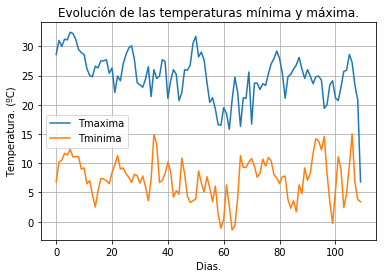

In [18]:
#ahora graficas por dia la temperatura máxima y mínima
df5 = df4[["Tmaxima","Tminima"]]
plt.figure(); df5.plot(); plt.legend(loc='best')
plt.title("Evolución de las temperaturas mínima y máxima.")
plt.ylabel("Temperatura. (ºC)")
plt.xlabel("Dias.")
plt.grid(True)
plt.savefig("1",plt=2000)
plt.show()